# **Quantum Circuits**


In [1]:
!pip3 install qiskit ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Circuit-1:** Construct Quantum Gate using Hard-wired code


In [2]:
from qiskit import QuantumCircuit


In [3]:
!pip3 install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


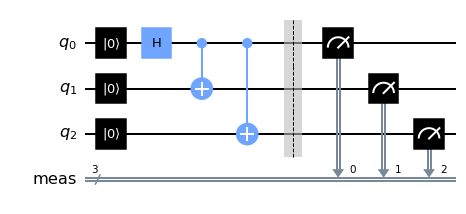

In [4]:
qc = QuantumCircuit(3)
#Construct using hard-wired code
qc.reset(0)
qc.reset(1)
qc.reset(2)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure_all()
qc.draw(output="mpl")

## **Circuit-2:** Construct Gate Dynamically

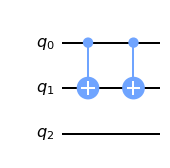

In [5]:
#Construct dynamically
from qiskit import QuantumCircuit
from qiskit.circuit.library import CXGate
qc = QuantumCircuit(3)
cxg = CXGate()
qc.append(cxg,[0,1])
qc.append(cxg,[0,1])
qc.draw(output="mpl")

## **Circuit-3:** Making Quantum Circuit from Template


In [6]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter


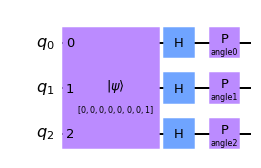

In [7]:
#make a template circuit
qc = QuantumCircuit(3)
qc.initialize([0,0,0,0,0,0,0,1])#initial state vector
param0 = Parameter("angle0")
param1 = Parameter("angle1")
param2 = Parameter("angle2")
qc.h(0)
qc.h(1)
qc.h(2)
qc.p(param0,0)
qc.p(param1,1)
qc.p(param2,2)
qc.draw(output="mpl")

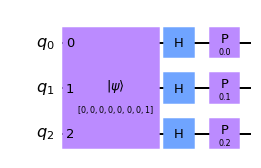

In [8]:
#make a circuit from the template
qcinstance = qc.bind_parameters({param0:0.0  , param1:0.1 , param2:0.2 })
qcinstance.draw(output="mpl")

## **Circuit-4:** Making a custom Gate

In [9]:
from qiskit import QuantumCircuit


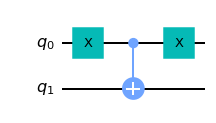

In [10]:
#Make a custom gate
gatesource = QuantumCircuit(2)
gatesource.x(0)
gatesource.cx(0,1)
gatesource.x(0)
xcnotxgate = gatesource.to_gate()
gatesource.draw(output="mpl")

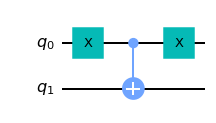

In [11]:
customgateqc = QuantumCircuit(2)
customgateqc.append(xcnotxgate,[0,1])
customgateqc.draw(output="mpl")
customgateqc.decompose().draw(output="mpl")

## **Circuit-5:** Making a Qubit Setter

In [12]:
from qiskit import QuantumCircuit


In [13]:
#Make a qubit setter
instrsource = QuantumCircuit(1)
instrsource.reset(0)
instrsource.x(0)
setqubit = instrsource.to_instruction()

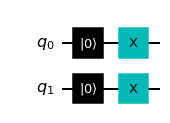

In [14]:
custominstrqc = QuantumCircuit(2)
custominstrqc.append(setqubit,[0])
custominstrqc.append(setqubit,[1])
custominstrqc.decompose().draw(output="mpl")

## **Circuit Matrix**

In [15]:
from qiskit import QuantumCircuit, transpile, Aer


In [16]:
simulator = Aer.get_backend("aer_simulator")


In [17]:
circuit = QuantumCircuit(2, 2)


In [18]:
# Add a H gate on qubit 0
circuit.h(0)

In [19]:
# Add a CX (CNOT) gate on control qubit 0 and acting on qubit 1
circuit.cx(0, 1)

In [20]:
# Save the matrix of the circuit until this point
circuit.save_unitary()

compiled_circuit = transpile(circuit, simulator)

job = simulator.run(compiled_circuit)

result = job.result()


In [21]:
# Print the unitary matrix representation of circuit
print(result.get_unitary(circuit,3)) # 3 is the number of digits of precision

Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


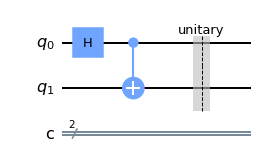

In [22]:
# Draw the circuit. 
circuit.draw(output = "mpl")